In [25]:
import networkx as nx
import random
from pyvis.network import Network
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\-\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


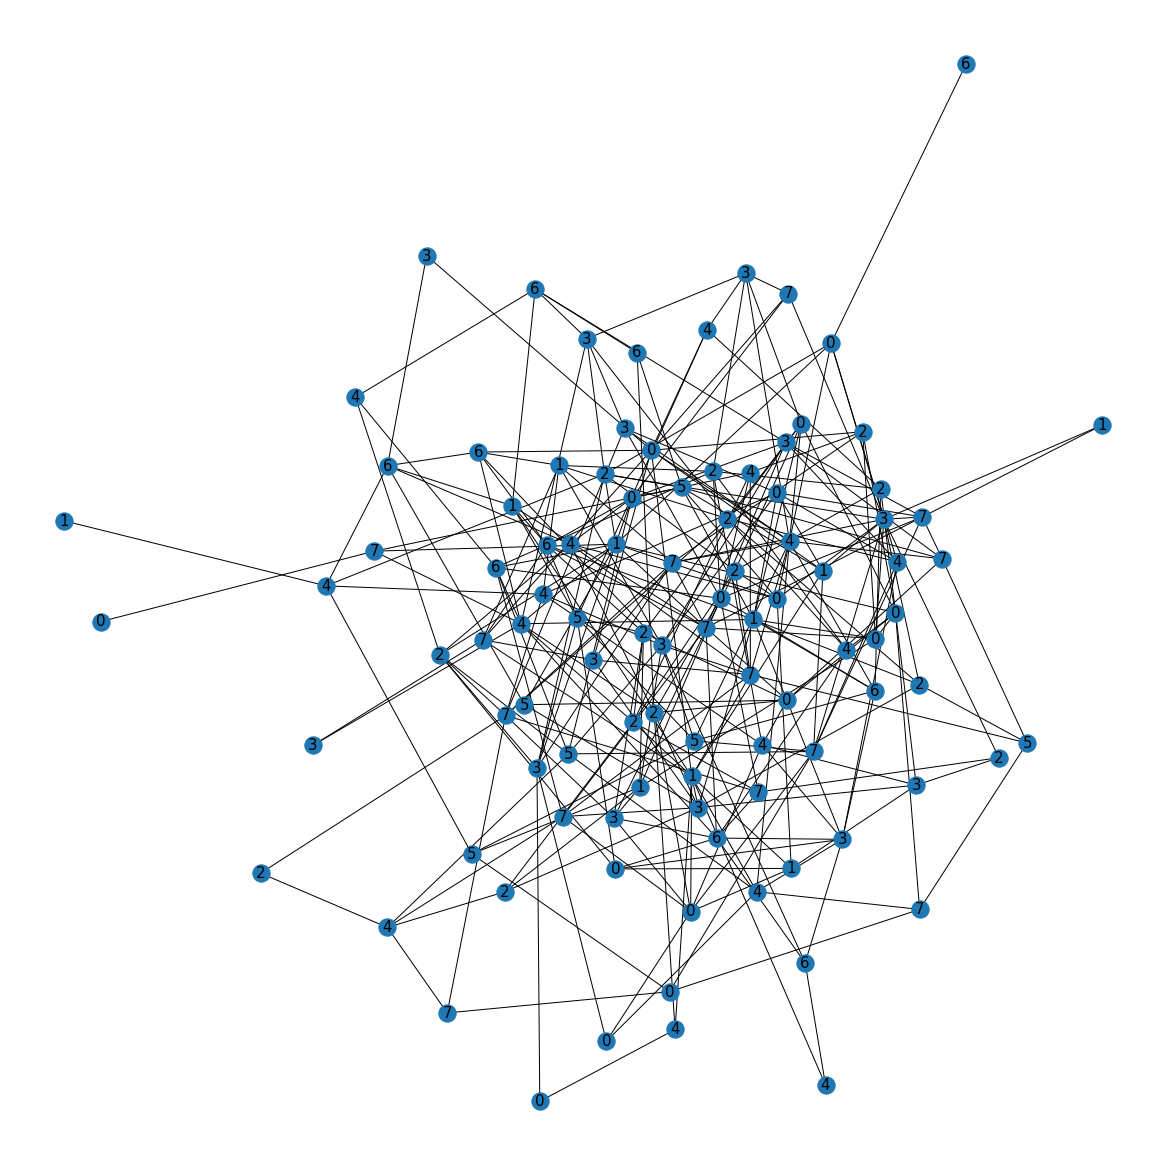

In [31]:
G = nx.gnm_random_graph(100, 300)

attrs = {}
for i in range(len(G.nodes(data=True))):
    attrs[i] = {"weight": random.randint(0,7)}
nx.set_node_attributes(G, attrs)

plt.figure(3,figsize=(16,16)) 
pos = nx.spring_layout(G)

nx.draw(G, pos)

_labels = nx.get_node_attributes(G,'weight')
nx.draw_networkx_labels(G, pos, labels = _labels, font_size = 15)


plt.show()

In [32]:
#epicenter1 = random.randint(0,19)
#G.nodes[epicenter1]['weight'] = 10

#epicenter2 = random.randint(0,19)
#G.nodes[epicenter2]['weight'] = 10

#print("Эпицентр 1: " + str(epicenter1) + "\nЭпицентр 2: " + str(epicenter2)) 

In [27]:
def structural_destruction(G):

    if nx.is_empty(G):
        return None

    epicenters = []

    for node in G.nodes(data='weight'):
        if node[1] >= 10:
                epicenters.append(node[0])
                
    adjacent = [[] for i in range(len(epicenters))]            
    for edge in G.edges():
        for i in range(len(epicenters)):
            print(len(epicenters))
            if epicenters[i] == edge[0]:
                adjacent[i].append(edge[1])
            if epicenters[i] == edge[1]:
                adjacent[i].append(edge[0])

    for node in epicenters:
        G.remove_node(node)
        for i in range(len(adjacent)):
            try:
                adjacent[i].remove(node)
            except:
                pass

    for i in range(len(adjacent)):
        try:
            increment = round(10/len(adjacent[i]), 2)
        except ZeroDivisionError:
            pass
        for node in adjacent[i]:
            G.nodes[node]['weight'] += increment
    for node in G.nodes(data="weight"):
        if node[1] >= 10:
            structural_destruction(G)
    #print(G.nodes(data='weight'))

In [33]:
#print("Процесс структурного разрушения графа: ")
#structural_destruction(G)

In [29]:
epicenters = [random.randint(0,49) for i in range(20)]
for node in epicenters:
    G.nodes[node]['weight'] = 10
c = 0
destroyed = []

if nx.is_connected(G):
    diameters = [nx.diameter(G)]
else:
    diameters = [0]
while len(G) > 1:
    if nx.is_connected(G):
        epicenters = []
        for node in G.nodes(data='weight'):
            if node[1] >= 10:
                epicenters.append(node[0])
        if len(epicenters) < 1:
            rand = random.randint(0, len(G) - 1)
            G.nodes[list(G.nodes)[rand]]['weight'] = 10
        structural_destruction(G)
    else:
        S = [G.subgraph(c).copy() for comp in nx.connected_components(G)]
        G = max(S, key=len)
        epicenters = []
        for node in G.nodes(data='weight'):
            if node[1] >= 10:
                epicenters.append(node[0])
        if len(epicenters) < 1:
            rand = random.randint(0, len(G) - 1)
            G.nodes[list(G.nodes)[rand]]['weight'] = 10
        structural_destruction(G)
        destroyed.append(c)
    c += 1
    try:
        diameters.append(nx.diameter(G))
    except:
        diameters.append(0)
counters = [i for i in range(c+1)]
x = [0 for i in range(len(destroyed))]

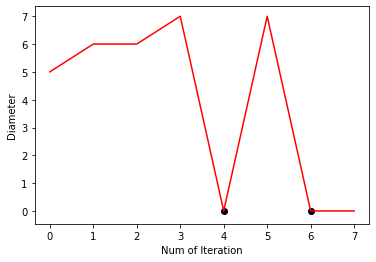

In [30]:
plt.plot(counters, diameters, color='red')
plt.xlabel("Num of Iteration")
plt.ylabel("Diameter")
plt.scatter(destroys, x, color='black')